## Helpdesk Issue Classification

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### READ IN LOCAL DATA DUMP 

In [2]:
data_raw = pd.read_excel("incident_data.xlsx")

#### INITIAL EXAMINATION OF THE DATA, SHAPE AND SAMPLE ROWS

In [3]:
print("Raw data shape:", data_raw.shape, '\n')
data_raw.head()

Raw data shape: (4802, 31) 



,Incident Identifier(NEOS),Created Date,Solution End Date Time TZ (Inc),Duration Hours,NEOS1\n,Team Name (Inc),Master Customer Name (Inc),Master Customer Number (Inc),Customer Name,Site Name (Inc),...,Product Cat Tier 3,Product Cat Tier 4,Resolution Product Cat Tier 1,Resolution Product Cat Tier 2,Resolution Product Cat Tier 3,Resolution Product Cat Tier 4,FCR,RR,Closed by,Incident Status Description (Inc)
0,INC000018813521,2022-05-16 01:27:37,2022-05-16 01:46:02,0.306944,NEOS,HSR/Enterprise Aloha Popeyes Incident Management,ELITE CAJUN FOODS LLC,10198326,Popeyes Louisiana Kitchen (Brand),POPEYES #12486 9747099,...,HW Failure,NaN,z_PinPad / CC Machine,Won't Read,HW Failure,NaN,1,0,ir250108,Fixed
1,INC000018814008,2022-05-16 02:12:31,2022-05-20 13:24:17,107.196111,NEOS,HSR/Enterprise Aloha Popeyes Escalated Management,"ELA FOODS, INC",10134521,Popeyes Louisiana Kitchen (Brand),POPEYES #7375 9691011,...,Items crossed out,NaN,z_Aloha Takeout,Online ordering,Items crossed out,NaN,0,0,tc250273,Fixed
2,INC000018814015,2022-05-16 02:14:57,2022-05-20 15:41:04,109.435278,NEOS,HSR/Enterprise Aloha Popeyes Escalated Management,SUNSHINE FOODS INC,10190529,Popeyes Louisiana Kitchen (Brand),POPEYES #11362 9730270,...,Items crossed out,NaN,z_Aloha Takeout,Online ordering,Items crossed out,NaN,0,0,tc250273,Fixed
3,INC000018814050,2022-05-16 02:35:38,2022-05-16 02:36:24,0.012778,NEOS,HSR/Enterprise Aloha Popeyes Incident Management,TOP GOLF USA INC.,9970469,Top Golf USa INC.,TOP GOLF - FORT WORTH 10278846,...,Configuration,NaN,z_Electronic Draft Capture,Back Of House,Configuration,NaN,1,0,vo185020,Fixed
4,INC000018815586,2022-05-16 04:51:19,2022-05-16 04:52:30,0.019722,NEOS,HSR/Enterprise Aloha Critical Incident Managem...,Krystal Restaurants LLC,7392911,Krystal Company,KRYSTAL COL001 7468107,...,Enroll fingerprint,NaN,z_Aloha POS,Front Of House,Enroll fingerprint,NaN,1,0,ai250176,Fixed


#### CHECK DATA FOR DTYPES

In [4]:
data_raw.dtypes

Incident Identifier(NEOS)             object
Created Date                          object
Solution End Date Time TZ (Inc)       object
Duration Hours                       float64
NEOS1\n                               object
Team Name (Inc)                       object
Master Customer Name (Inc)            object
Master Customer Number (Inc)           int64
Customer Name                         object
Site Name (Inc)                       object
City (Inc)                            object
Severity Code (Inc)                    int64
Problem Note Text (Inc)               object
Action Notes                          object
Submitter Name (Inc)                  object
Operational Catogerization Tier 1     object
Operational Catogerization Tier 2     object
Operational Catogerization Tier 3     object
NEOS2                                 object
Product Cat Tier 1                    object
Product Cat Tier 2                    object
Product Cat Tier 3                    object
Product Ca

#### We need to correct the data type of several numeric columns that should be Objects instead of Int/Float, or ensure data consistency across Object features

In [5]:
data_raw['Severity Code (Inc)'] = data_raw['Severity Code (Inc)'].astype("object")
data_raw['FCR'] = data_raw['FCR'].astype("object")
data_raw['RR'] = data_raw['RR'].astype("object")

data_raw['Product Cat Tier 1'] = data_raw['Product Cat Tier 1'].astype("string")
data_raw['Product Cat Tier 2'] = data_raw['Product Cat Tier 2'].astype("string")
data_raw['Product Cat Tier 3'] = data_raw['Product Cat Tier 3'].astype("string")


#### REMOVE COLUMNS UNNEEDED FOR MODEL
#### COLUMNS REMOVED HAVE NO VALUABLE ASSOCIATION WITH THE CATEGORIZATION
##### Separate out the Resolution Categories and Prod_cat4, which will be outside the scope of this project
###### <i> Res_cat selections are the same as Prod_cat, but are categorized by the agent at the end of the ticket cycle instead of at the onset. We are less concerned with Res_cat </i>

In [6]:
res_cats = data_raw[["Product Cat Tier 4", "Resolution Product Cat Tier 1", "Resolution Product Cat Tier 2", 
                     "Resolution Product Cat Tier 3", "Resolution Product Cat Tier 4"]]
                     
drop_columns= ["Incident Identifier(NEOS)", "Solution End Date Time TZ (Inc)", "NEOS1\n", 
               "Master Customer Name (Inc)", "Master Customer Number (Inc)", 
               "Site Name (Inc)", 'City (Inc)', "Submitter Name (Inc)", 
               "Operational Catogerization Tier 1", "Operational Catogerization Tier 2",
               "Operational Catogerization Tier 3", "Product Cat Tier 4", "Resolution Product Cat Tier 1", 
               "Resolution Product Cat Tier 2", "Resolution Product Cat Tier 3", 
               "Resolution Product Cat Tier 4", "NEOS2", "Closed by", 
               "Incident Status Description (Inc)"]
data_cols= data_raw.drop(drop_columns, axis=1)

In [7]:
data_cols.head()

,Created Date,Duration Hours,Team Name (Inc),Customer Name,Severity Code (Inc),Problem Note Text (Inc),Action Notes,Product Cat Tier 1,Product Cat Tier 2,Product Cat Tier 3,FCR,RR
0,2022-05-16 01:27:37,0.306944,HSR/Enterprise Aloha Popeyes Incident Management,Popeyes Louisiana Kitchen (Brand),0,VF All PP's Down Site Key: #354767,2022-05-16 00:27 - ir250108\nWorking Log: Fiel...,z_PinPad / CC Machine,Won't Read,HW Failure,1,0
1,2022-05-16 02:12:31,107.196111,HSR/Enterprise Aloha Popeyes Escalated Management,Popeyes Louisiana Kitchen (Brand),2,Popeyes (7375) - POS Support Request,2022-05-16 01:12 - cm185130\nGeneral Informati...,z_Aloha Takeout,Online ordering,Items crossed out,0,0
2,2022-05-16 02:14:57,109.435278,HSR/Enterprise Aloha Popeyes Escalated Management,Popeyes Louisiana Kitchen (Brand),2,Point of Sale,2022-05-16 01:14 - cm185130\nWorking Log: Fiel...,z_Aloha Takeout,Online ordering,Items crossed out,0,0
3,2022-05-16 02:35:38,0.012778,HSR/Enterprise Aloha Popeyes Incident Management,Top Golf USa INC.,2,EDC not launching on CMC,2022-05-16 01:35 - vo185020\nWorking Log: Fiel...,z_Electronic Draft Capture,Back Of House,Configuration,1,0
4,2022-05-16 04:51:19,0.019722,HSR/Enterprise Aloha Critical Incident Managem...,Krystal Company,2,Manager cant log in,2022-05-16 03:51 - ai250176\nGeneral Informati...,z_Aloha POS,Front Of House,Enroll fingerprint,1,0


#### SIMPLIFY COLUMN NAMES

In [8]:
cols_names= ["created","age_hours","team","cust_name","sev","problem_notes","action_notes",
            "prod_cat1","prod_cat2","prod_cat3", "FCR","RR"]
data_cols.columns = cols_names
data_cols.dtypes

created           object
age_hours        float64
team              object
cust_name         object
sev               object
problem_notes     object
action_notes      object
prod_cat1         string
prod_cat2         string
prod_cat3         string
FCR               object
RR                object
dtype: object

#### CHECK FOR MISSING VALUES

<AxesSubplot:>

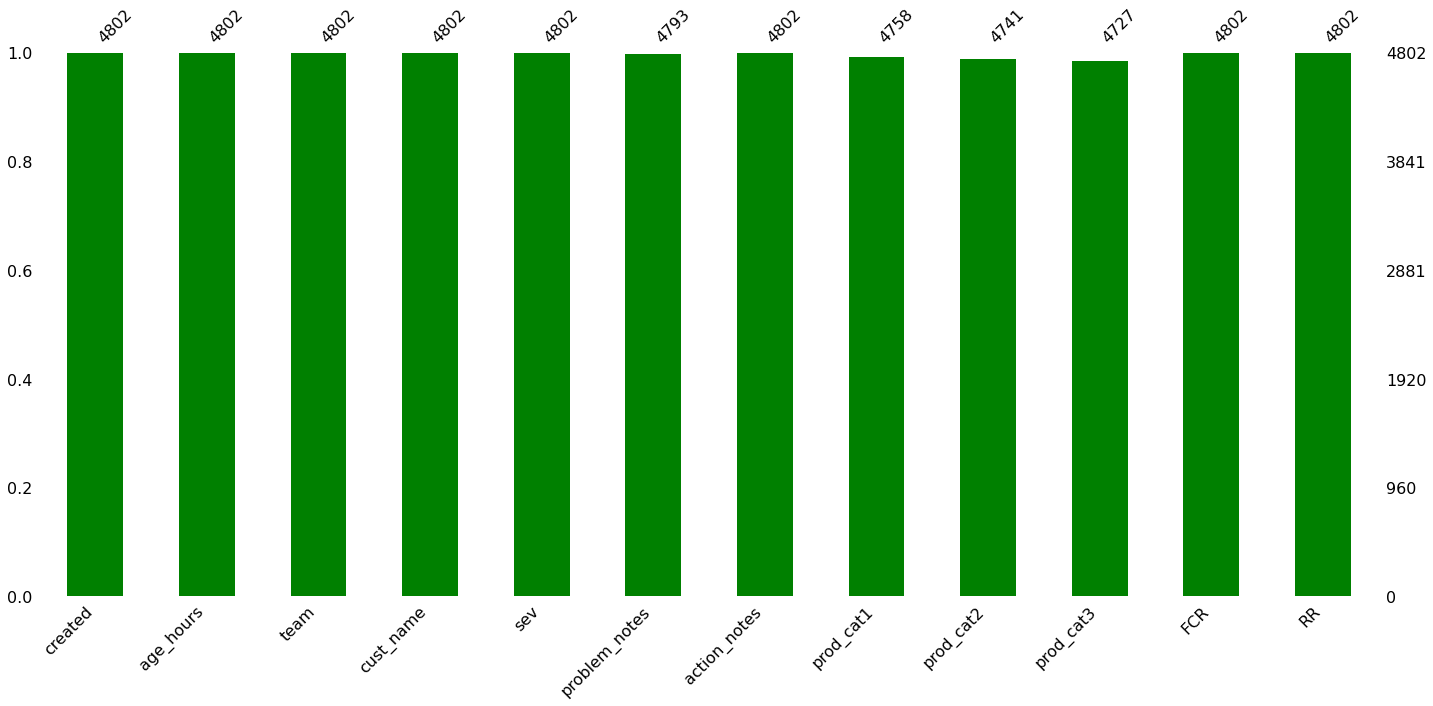

In [133]:
import missingno as msno
fig = plt.figure()
fig.patch.set_facecolor('white')
msno.bar(data_cols, color='green')

#### Domain knowledge tells us missing hours from 'Age_Hours' is due to helpdesk cases not yet Closed at the time of the data pull. We will impute these using Median and then check again for missing values

In [10]:
data_cols.age_hours.fillna(data_cols.age_hours.median(), inplace=True)
data_cols.age_hours.isna().sum()

0

#### Now let's check for outliers in Age_Hours

<AxesSubplot:xlabel='age_hours', ylabel='Count'>

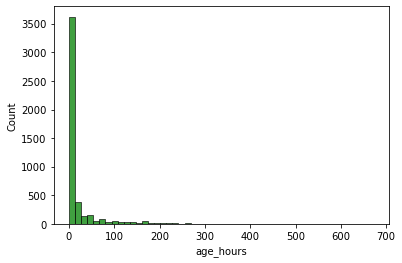

In [11]:
fig = plt.figure()
fig.patch.set_facecolor('white')
sns.histplot(x='age_hours', data=data_cols, bins=50, color='green')

#### From the above, we can see there are some extreme outliers. Let's investigate these

In [12]:
print("Percentage of cases with Age > 300 hrs\n", 
      round(len(data_cols[data_cols['age_hours'] > 500]) / len(data_cols), 3), "%")

Percentage of cases with Age > 300 hrs
 0.001 %


#### Domain knowledge tells us these outliers are tickets which would surely have gone to development, out of Support's hands, and so we would not be interested in their age to help us distinguish the category, but leaving their extreme values in place will disrupt use of that feature in categorization learning. 
#### Replacing these outlier values in age_hours with the Median

In [13]:
for x in range(len(data_cols.age_hours)):
    if data_cols.age_hours[x] > 300:
        data_cols.age_hours[x] = data_cols.age_hours.median()

C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/1304812944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cols.age_hours[x] = data_cols.age_hours.median()


<AxesSubplot:xlabel='age_hours', ylabel='Count'>

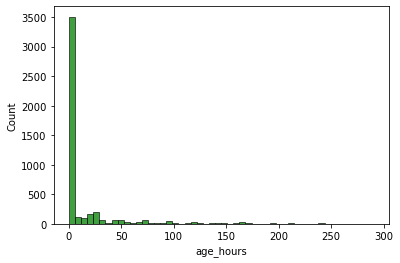

In [14]:
fig = plt.figure()
fig.patch.set_facecolor('white')
sns.histplot(x='age_hours', data=data_cols, bins=50, color='green')

## Data_dropna
#### Missing values from our Prod_Cat features cannot be imputed, and are our target variable(s). 
###### Rows with any remaining missing values will be dropped, except for those with missing values in Prod_cat4, which we expect to not be populated in most cases

In [15]:
data_dropna= data_cols.dropna(subset=['created', 'age_hours', 'team', 'cust_name', 'sev', 'problem_notes',
                               'action_notes', 'prod_cat1', 'prod_cat2', 'prod_cat3', 'FCR', 'RR'])
data_dropna.reset_index(drop=True, inplace=True)

In [16]:
## DESCRIBE CONTINUOUS VARIABLE COLUMNS

data_dropna.describe().T

,count,mean,std,min,25%,50%,75%,max
age_hours,4718.0,16.868081,40.994644,0.0,0.200972,0.631111,8.352639,289.986944


In [17]:
## DESCRIBE DISCRETE VARIABLE COLUMNS

data_dropna[['created', 'team', 'cust_name',
       'problem_notes', 'action_notes']].describe().T

,count,unique,top,freq
created,4718,4711,2022-05-27 10:02:49,2
team,4718,13,HSR/Enterprise Aloha Popeyes Incident Management,1731
cust_name,4718,280,Popeyes Louisiana Kitchen (Brand),1664
problem_notes,4718,4236,DT OTC PP not working,26
action_notes,4718,4665,#OVERFLOW,54


## DF1 - TEAM Cleanup
#### Now that there are no longer any missing values, we can work further clean up of our categorical variables
#### START WITH CLEANUP OF "TEAM", A KEY FEATURE FOR THIS SEGMENTATION

In [18]:
data_dropna.team.value_counts()

HSR/Enterprise Aloha Popeyes Incident Management       1731
HSR/Enterprise Aloha Critical Incident Management      1158
HSR/Enterprise Aloha Essential Incident Management      558
HSR/Enterprise Aloha Hardware                           431
HSR/Enterprise Aloha Essential Escalated Management     162
HSR/Enterprise Aloha FHS Incident Management            159
HSR/Enterprise Aloha Popeyes Verifone                   131
HSR/Enterprise Aloha BWW Incident Management            116
HSR/Enterprise Aloha Critical Escalated Management      106
HSR/Enterprise Aloha Popeyes Escalated Management        61
HSR/Enterprise Advanced Technical                        55
HSR/Enterprise Aloha FHS Escalated Management            35
HSR/Enterprise Aloha BWW Escalated Management            15
Name: team, dtype: int64

In [19]:
mapping_dict= {"HSR/Enterprise Aloha Popeyes Incident Management": "popeyes_imt", "HSR/Enterprise Aloha Critical Incident Management": "critical_imt",
               "HSR/Enterprise Aloha Wingstop Incident Management": "wingstop_imt", "HSR/Enterprise Aloha Wingstop Escalated Management": "wingstop_emt",
              "HSR/Enterprise Aloha Essential Incident Management": "essential_imt", "HSR/Enterprise Aloha Hardware": "hwt_emt", "HSR/Enterprise Aloha Essential Escalated Management": "essential_emt",
              "HSR/Enterprise Aloha FHS Incident Management": "fhs_imt", "HSR/Enterprise Aloha Popeyes Verifone": "popeyes_imt",
              "HSR/Enterprise Aloha BWW Incident Management": "bww_imt", "HSR/Enterprise Aloha Critical Escalated Management": "critical_emt",
              "HSR/Enterprise Aloha Popeyes Escalated Management": "popeyes_emt", "HSR/Enterprise Advanced Technical": "att_emt",
              "HSR/Enterprise Aloha FHS Escalated Management": "fhs_emt", "HSR/Enterprise Aloha Essential WIT": "essential_emt",
               "HSR/Enterprise NBO WIT": "nbo_emt", "HSR/Enterprise Aloha BWW Escalated Management": "bww_emt", 
               "HSR/Enterprise Aloha Critical WIT": "critical_emt", "HSR/Enterprise Aloha BWW WIT": "bww_emt",
               "HSR/Enterprise Aloha FHS WIT": "fhs_emt", "HSR/Enterprise BSP WIT": "bsp_emt",
               "HSR/Enterprise Aloha Wingstop WIT": "wingstop_emt", "HSR/Enterprise Aloha Popeyes WIT": "popeyes_emt",
              }

#hosted_dict= {"HSR/Enterprise Hosted Pulse Incident Management": "pulse_imt", "HSR/Enterprise Hosted Insight Polling Incident Management": "polling_imt", "HSR/Enterprise Hosted CMC Incident Management": "cmc_imt", "HSR/Enterprise Hosted Customer Voice Escalated Management": "voice_emt", "HSR/Enterprise Hosted CFC Escalated Management": "cfc_emt","HSR/Enterprise Hosted Insight Reports Escalated Management": "reports_emt", "HSR/Enterprise Hosted Loyalty Escalated Management": "loyalty_emt",
#              "HSR/Enterprise Hosted ASV Incident Management": "asv_imt", "HSR/Enterprise Hosted Restaurant Guard Escalated Management": "guard_emt",
#              "HSR/Enterprise Hosted CMC Escalated Management": "cmc_emt", "HSR/Enterprise Hosted WIT": "hosted_emt", "HSR/Enterprise Hosted Online Ordering Incident Management": "olo_imt",
#              "HSR/Enterprise Hosted BSP Escalated Management": "bsp_emt", "HSR/Enterprise Hosted Mobile Pay Escalated Management": "mobile_emt",
#             "HSR/Enterprise Hosted Insight Polling Escalated Management": "polling_emt",  "HSR/Enterprise Hosted Console Escalated Management": "console_emt",
#              "HSR/Enterprise Hosted ASV Escalated Management": "asv_emt", "HSR/Enterprise Hosted Online Ordering Escalated Management": "olo_emt",
#              }

In [20]:
df1= data_dropna
df1.team.replace(to_replace=mapping_dict, inplace=True)

C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


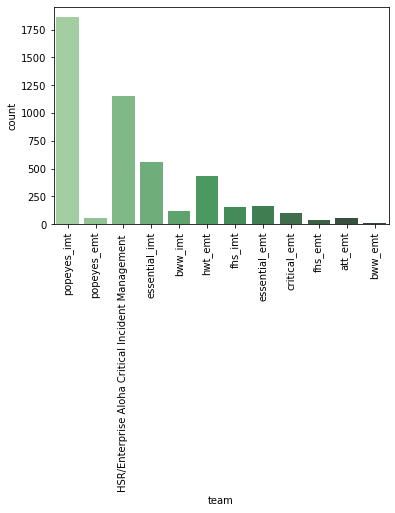

In [21]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.countplot(x='team', data=df1, palette='Greens_d')
plt.xticks(rotation=90)
plt.show()

#### WE CAN SEE FROM THE ABOVE, ONE VALUE DID NOT MAP CORRECTLY. LET'S FIX THIS...

In [22]:
df1.team.replace(to_replace="HSR/Enterprise Aloha Critical Incident Management ", 
                            value="critical_imt", inplace=True) 

C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [23]:
print(df1.team.unique())

['popeyes_imt' 'popeyes_emt' 'critical_imt' 'essential_imt' 'bww_imt'
 'hwt_emt' 'fhs_imt' 'essential_emt' 'critical_emt' 'fhs_emt' 'att_emt'
 'bww_emt']


#### Teams are generally specialized to a specific product or specialized to a specific customer(s), meaning a specific solution set. We are interested in both pieces for our categorization. 
#### The IMT / EMT distinction indicates Tier1 or Tier2, which could also be said to indicate the complexity of the issue, or difficulty in solving. This is also interesting for our classification analysis. But we need to separate these two parts; the team name from the Tier distinction

In [24]:
# ITERATE THROUGH THE TEAM SERIES, EVALUATE STR OBJECTS THAT CONTAIN '_IMT' AND POPULATE 'IMT' FEATURE
# VALUE OF 1 INDICATES IMT, VALUE OF 0 INDICATES EMT

df1["imt"] = 0
for x in range(len(df1.team)):
    if df1.team[x].find("_imt") > 0:
        df1.imt[x] = 1
    else:
        df1.imt[x] = 0

C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/2195989224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["imt"] = 0
C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/2195989224.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.imt[x] = 1
C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/2195989224.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.

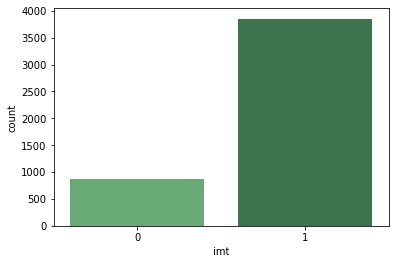

In [25]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.countplot(x='imt', data=df1, palette='Greens_d')
plt.show()

#### Now that we've separated out the 'tier level', we can see there is a lot of bias in this category, as over 80% of cases are resolved at the IMT level, and we may later need to use bootstrapping /sampling to inflate that class. 
###### As well, we can now condense our Team options to exclude this differentiation

In [26]:
temp_list= []
for x in df1.team:
    temp_list.append(x.split("_")[0])
df1.team = temp_list

C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


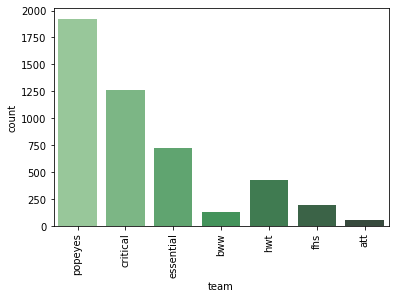

In [27]:
# NOW WE CAN PRINT OUR COUNT CHART AGAIN TO SHOW THE CONSOLIDATION

fig = plt.figure()
fig.patch.set_facecolor('white')
ax = sns.countplot(x='team', data=df1, palette='Greens_d')
plt.xticks(rotation=90)
plt.show()

## DF2: One-hot
#### In order to use the 'Team' categorical feature in our machine learning, let's first get_dummies()

In [28]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [29]:
df2= encode_and_bind(df1, 'team')
df2.head()

,created,age_hours,cust_name,sev,problem_notes,action_notes,prod_cat1,prod_cat2,prod_cat3,FCR,RR,imt,team_att,team_bww,team_critical,team_essential,team_fhs,team_hwt,team_popeyes
0,2022-05-16 01:27:37,0.306944,Popeyes Louisiana Kitchen (Brand),0,VF All PP's Down Site Key: #354767,2022-05-16 00:27 - ir250108\nWorking Log: Fiel...,z_PinPad / CC Machine,Won't Read,HW Failure,1,0,1,0,0,0,0,0,0,1
1,2022-05-16 02:12:31,107.196111,Popeyes Louisiana Kitchen (Brand),2,Popeyes (7375) - POS Support Request,2022-05-16 01:12 - cm185130\nGeneral Informati...,z_Aloha Takeout,Online ordering,Items crossed out,0,0,0,0,0,0,0,0,0,1
2,2022-05-16 02:14:57,109.435278,Popeyes Louisiana Kitchen (Brand),2,Point of Sale,2022-05-16 01:14 - cm185130\nWorking Log: Fiel...,z_Aloha Takeout,Online ordering,Items crossed out,0,0,0,0,0,0,0,0,0,1
3,2022-05-16 02:35:38,0.012778,Top Golf USa INC.,2,EDC not launching on CMC,2022-05-16 01:35 - vo185020\nWorking Log: Fiel...,z_Electronic Draft Capture,Back Of House,Configuration,1,0,1,0,0,0,0,0,0,1
4,2022-05-16 04:51:19,0.019722,Krystal Company,2,Manager cant log in,2022-05-16 03:51 - ai250176\nGeneral Informati...,z_Aloha POS,Front Of House,Enroll fingerprint,1,0,1,0,0,1,0,0,0,0


***
##### <font c=green> One-hot encoding for Cust_Name will be Out of Scope for this project for now </font>
***

### Concatenate Prod_Cat features
###### We want 1 target variable, not 3, so we will concat these and split them post-prediction

In [30]:
df2["prod_cat"] = df2.prod_cat1
for i in range(len(df2.prod_cat)):
    df2.prod_cat[i] = df2.prod_cat1[i] + "," + df2.prod_cat2[i] + "," + df2.prod_cat3[i]

df2.prod_cat.value_counts()

z_PinPad / CC Machine,Display,Incorrect Screen              283
z_PinPad / CC Machine,Won't Read,HW Failure                 279
Software,Application,Aloha                                  156
Hardware,Front of House (FOH),POS Terminal                  122
z_Terminal,Slow / Lagging,Slow/Lagging                      110
                                                           ... 
z_Aloha POS,Aloha Integration,Aloha Integration               1
z_Remote Application Loader,Terminal Down,Partial Reload      1
z_Orderpoint,Display,Orderpoint Error on Display              1
z_Electronic Draft Capture,New Install,Outstanding Issue      1
Software,Software,Retail RealPOS                              1
Name: prod_cat, Length: 297, dtype: Int64

###### For the scope of this project, we will drop rows with values of Prod_Cat that appear only once in value_counts()

In [132]:
ind_list= list(df2.prod_cat.value_counts()[df2.prod_cat.value_counts() == 1].index)
df3= df2.loc[~df2['prod_cat'].isin(ind_list)]
df3.prod_cat.value_counts()

z_PinPad / CC Machine,Display,Incorrect Screen    283
z_PinPad / CC Machine,Won't Read,HW Failure       279
Software,Application,Aloha                        156
Hardware,Front of House (FOH),POS Terminal        122
z_Terminal,Slow / Lagging,Slow/Lagging            110
                                                 ... 
z_Kitchen Controller,No Orders,HW Failure           2
Software,POS,Front Counter                          2
Software,Payment System,Pin Pad Software            2
z_Aloha POS,Front Of House,Declare tips issue       2
z_Other,Unable to Contact,Unable to Contact         2
Name: prod_cat, Length: 235, dtype: Int64

In [32]:
df3.drop(["prod_cat1", "prod_cat2", "prod_cat3"], axis=1, inplace=True)
df3.shape

C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(4656, 17)

# Text Pre-Processing
#### Let's now do some text pre-processing on our most important fields, the Problem Notes and the Action Notes, starting with getting a sense of what our Problem Notes series contains

#### Problem Notes : Single-line description of the issue

In [33]:
for x in range(5):
    print(x, df3.problem_notes[x], '\n')

0 VF All PP's Down  Site Key: #354767 

1 Popeyes (7375) - POS Support Request 

2 Point of Sale 

3 EDC not launching on CMC 

4 Manager cant log in 



In [34]:
df3['problem_notes'] = df3['problem_notes'].astype("string")

C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/1843670480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['problem_notes'] = df3['problem_notes'].astype("string")


In [35]:
print('NA Cells in Problem Notes: ', df3.problem_notes.isna().sum())
df3.problem_notes= df3.problem_notes.fillna("")
print('NA Cells in Problem Notes after fillna(): ', df3.problem_notes.isna().sum())

NA Cells in Problem Notes:  0
NA Cells in Problem Notes after fillna():  0


C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [36]:
## START AN EMPTY LIST AND USE IT TO CREATE A NEW FEATURE CONTAINING 
        ## THE LEN() OF EACH VALUE OF PROBLEM_NOTES

len_list = []
for x in df3.problem_notes:
    len_list.append(len(x))

df3["len_prob_notes"] = len_list

C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/471089654.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["len_prob_notes"] = len_list


<AxesSubplot:title={'center':'Len() of Problem Notes'}, xlabel='Number of characters', ylabel='Count in Bin'>

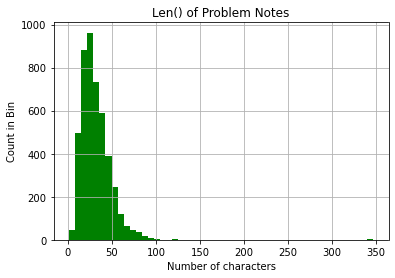

In [43]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Number of characters')
ax.set_ylabel('Count in Bin')
ax.set_title('Len() of Problem Notes')
df3["len_prob_notes"].hist(bins=50, color='green')

#### We have a vast majority of Problem_Notes which are <100 characters. It is predominately the first line of the Problem_notes which is the most descriptive of the issue, and is what we are going to focus on 
#### We will split the first line of each text into a separate column, rewriting the len() of this consolidated problem notes into the len_prob_notes field

In [41]:
df3.reset_index(drop=True, inplace=True)
df3["abbr_prob_notes"] = df3['problem_notes']
for i in range(len(df3.abbr_prob_notes)):
    df3.abbr_prob_notes[i] = df3.problem_notes[i].split('\n')[0]

#[print(len(x)) for x in df1.abbr_prob_notes]

C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/1881535854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["abbr_prob_notes"] = df3['problem_notes']


C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/4086170719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["len_prob_notes"] = len_list


<AxesSubplot:title={'center':'Len() of Problem Notes'}, xlabel='Number of characters', ylabel='Count in Bin'>

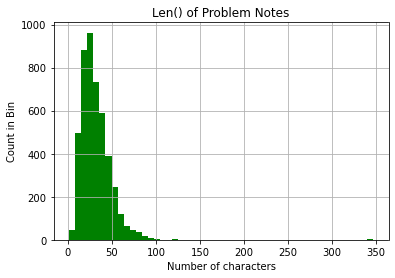

In [42]:
len_list = []
for x in df3.abbr_prob_notes:
    len_list.append(len(x))

df3["len_prob_notes"] = len_list

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Number of characters')
ax.set_ylabel('Count in Bin')
ax.set_title('Len() of Problem Notes')
df3["len_prob_notes"].hist(bins=50, color='green')

#### Action Notes: User entry field containing case notes from each agent who worked on the case over its lifecycle, extensive length and content.
#### Repeat steps for Problem Notes: Cast values to String, fill any NA, create a feature of Len() of Action Notes

In [44]:
df3['action_notes'] = df3['action_notes'].astype("string")

print('NA Cells in Action Notes: ', df3.action_notes.isna().sum())
df3.action_notes= df3.action_notes.fillna("")
print('NA Cells in Action Notes after fillna(): ', df3.action_notes.isna().sum())

NA Cells in Action Notes:  0
NA Cells in Action Notes after fillna():  0


C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/2082231184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['action_notes'] = df3['action_notes'].astype("string")


In [45]:
## START AN EMPTY LIST AND USE IT TO CREATE A NEW FEATURE CONTAINING 
        ## THE LEN() OF EACH VALUE OF PROBLEM_NOTES

len_list = []
for x in df3.action_notes:
    len_list.append(len(x))

df3["len_act_notes"] = len_list

C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/2133121018.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["len_act_notes"] = len_list


<AxesSubplot:title={'center':'Len() of Action Notes'}, xlabel='Number of characters', ylabel='Count in Bin'>

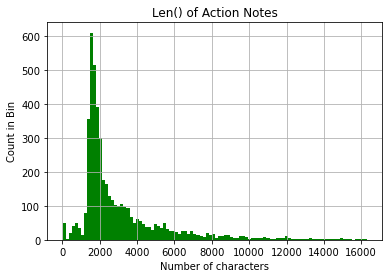

In [46]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_xlabel('Number of characters')
ax.set_ylabel('Count in Bin')
ax.set_title('Len() of Action Notes')
df3["len_act_notes"].hist(bins=100, color='green')

#### We see a steep peak around ~1500 characters and then a quick drop off after. 
###### Unlike Problem Notes, we cannot trim this down to some smaller amount. The total contents of Action Notes are equally valid in considering for word vectorization

In [47]:
### FUNCTION TO TAKE A SERIES OF TEXT AND CLEAN IT, REMOVING SPECIAL CHARACTERS, 
    ### REPLACING NEW LINES WITH " ", AND LOWER() ON EVERYTHING

def clean_text(series): 
    new_series = series.str.replace('[^a-zA-Z \n]', '')
    new_series = new_series.str.replace('\n', ' ')
    new_series = new_series.str.lower()
    return new_series
    

In [50]:
df3['clean_prob_notes'] = clean_text(df3['problem_notes'])

df3['clean_act_notes'] = clean_text(df3['action_notes'])


C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/2440874229.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  new_series = series.str.replace('[^a-zA-Z \n]', '')
C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/376186426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clean_prob_notes'] = clean_text(df3['problem_notes'])
C:\Users\DP185257\AppData\Local\Temp/ipykernel_26276/376186426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['

In [51]:
print(df3.clean_prob_notes.head(), '\n')
print(df3.clean_act_notes.head())

0       vf all pps down  site key 
1    popeyes   pos support request
2                    point of sale
3         edc not launching on cmc
4              manager cant log in
Name: clean_prob_notes, dtype: string 

0       ir working log field values on incident sub...
1       cm general information attachment added by ...
2       cm working log field values on incident sub...
3       vo working log field values on incident sub...
4       ai general information   point of contact f...
Name: clean_act_notes, dtype: string


#### Merge Problem Notes into Action Notes, as they are comparable fields with similar value when merged, and this gives us 1 text corpus to vectorize

In [76]:
df3["clean_text"] = df3.clean_prob_notes + df3.clean_act_notes
df3.drop(['clean_prob_notes', 'clean_act_notes', 'problem_notes', 'action_notes'], axis=1, inplace=True)
df3.clean_text

C:\Users\DP185257\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


0       vf all pps down  site key    ir working log fi...
1       popeyes   pos support request   cm general inf...
2       point of sale   cm working log field values on...
3       edc not launching on cmc   vo working log fiel...
4       manager cant log in   ai general information  ...
                              ...                        
4651    nbo issue sales  foh reports clock in issue   ...
4652    re fort worth terminal issues persist   ss wor...
4653    network issues   nn working log field values o...
4654    swall terminalsatonot working   ip working log...
4655    foh  sw  t  split check  guest  paid for entir...
Name: clean_text, Length: 4656, dtype: string

In [73]:
df3.columns

Index(['created', 'age_hours', 'cust_name', 'sev', 'problem_notes',
       'action_notes', 'FCR', 'RR', 'imt', 'team_att', 'team_bww',
       'team_critical', 'team_essential', 'team_fhs', 'team_hwt',
       'team_popeyes', 'prod_cat', 'len_prob_notes', 'abbr_prob_notes',
       'len_act_notes', 'clean_text'],
      dtype='object')

In [56]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DP185257\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Text vectorization

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(stop_words='english',
                    min_df=10, ngram_range=(1,3))

# Fit the vectorizer and transform the data
tv_transformed = tv.fit_transform(df3['clean_text'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')

Shape of the (1,3) n-gram vocabulary:  (4656, 16427)


"# Create a DataFrame with these features\ntv_df = pd.DataFrame(tv_transformed.toarray(), \n                     columns=tv.get_feature_names()).add_prefix('TFIDF_')\nprint(tv_df.head())"

In [68]:
print("Shape of the (1,3) n-gram vocabulary: ", tv_df.shape)

Shape of the (1,3) n-gram vocabulary:  (4656, 16427)


## DF4 - Vectorized Features

In [77]:
df4 = pd.concat([df3, tv_df], axis=1)
df4.head()

,created,age_hours,cust_name,sev,FCR,RR,imt,team_att,team_bww,team_critical,...,TFIDF_zip mb,TFIDF_zip mb expiration,TFIDF_zipped,TFIDF_zipped data,TFIDF_zipped data boh,TFIDF_zipped hld,TFIDF_zipped hld files,TFIDF_zipped translog,TFIDF_zone,TFIDF_zvjezdana
0,2022-05-16 01:27:37,0.306944,Popeyes Louisiana Kitchen (Brand),0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-05-16 02:12:31,107.196111,Popeyes Louisiana Kitchen (Brand),2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-05-16 02:14:57,109.435278,Popeyes Louisiana Kitchen (Brand),2,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-05-16 02:35:38,0.012778,Top Golf USa INC.,2,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-05-16 04:51:19,0.019722,Krystal Company,2,1,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Split dataset target (Y) variable "Prod_Cat" into separate array 
#### Dropping 'Created' and 'Cust_Name' also, as these are not numeric values that can be considered in a model

In [128]:
X = df4.drop(['prod_cat', 'created', 'cust_name', 'abbr_prob_notes', 'clean_text'], axis=1)
y = df4['prod_cat']
X.head()

,age_hours,sev,FCR,RR,imt,team_att,team_bww,team_critical,team_essential,team_fhs,...,TFIDF_zip mb,TFIDF_zip mb expiration,TFIDF_zipped,TFIDF_zipped data,TFIDF_zipped data boh,TFIDF_zipped hld,TFIDF_zipped hld files,TFIDF_zipped translog,TFIDF_zone,TFIDF_zvjezdana
0,0.306944,0,1,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107.196111,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109.435278,2,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012778,2,1,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.019722,2,1,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## SPLIT TRAIN/TEST SETS

In [129]:
from sklearn.model_selection import train_test_split
#Split data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3492, 16441) (1164, 16441)
(3492,) (1164,)


***
### MODELING 
***

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=300, random_state = 123))
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)